In [0]:
!sudo apt-get -y -qq update
!pip install missingno --quiet

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-0e25be44-a8c4-410b-9fa3-9db0a0829587/bin/python -m pip install --upgrade pip' command.


In [0]:
import warnings
warnings.filterwarnings("ignore")

# PANDAS
import pandas as pd
import numpy as np

# PYPLOT
import matplotlib.pyplot as plt

# TRATAMENTO DE MISSINGS
import missingno as ms 

# TRANSFORMAÇÃO DE DADOS
# Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

## SPARK
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark import SparkFiles

## MATH
from math import pi

FASE BRONZE

In [0]:
# CARGA DOS DADOS
dataset_tb_localidade = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/ajatoba/MVP-Sprint3-Alessandro-Jatoba/main/Localidade.csv", sep = ';', encoding='unicode_escape')) 

dataset_tb_forca_de_trabalho = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/ajatoba/MVP-Sprint3-Alessandro-Jatoba/main/Forca_de_trabalho.csv", sep = ';', encoding='unicode_escape'))

dataset_tb_provimento = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/ajatoba/MVP-Sprint3-Alessandro-Jatoba/main/Provimento.csv", sep = ';', encoding='unicode_escape'))

dataset_tb_financiamento = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/ajatoba/MVP-Sprint3-Alessandro-Jatoba/main/Financiamento.csv", sep = ';', encoding='unicode_escape'))

dataset_tb_governanca = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/ajatoba/MVP-Sprint3-Alessandro-Jatoba/main/Governanca.csv", sep = ';', encoding='unicode_escape'))

FASE PRATA

Tratamento de Missings

In [0]:
# CHECANDO QUANTIDADE DE NULOS NA TABELA 'LOCALIDADE'
dataset_tb_localidade.isnull().sum()


Out[4]: ano          0
Cidade       0
IDH-m        0
Populacao    0
dtype: int64

In [0]:
# CHECANDO QUANTIDADE DE NULOS NA TABELA 'FORÇA DE TRABALHO
dataset_tb_forca_de_trabalho.isnull().sum()


Out[5]: ano                                                      18
Cidade                                                   20
profissionais_de_saude_superior_por_10_000_habitantes    28
profissionais_de_saude_medio_por_10_000_habitantes       20
dtype: int64

In [0]:
# CHECANDO QUANTIDADE DE NULOS NA TABELA 'PROVIMENTO'
dataset_tb_provimento.isnull().sum()


Out[6]: ano                                                 18
Cidade                                              20
estabelecimentos_de_saude_por_100_000_habitantes    20
_leitos_de_internacao_por_10_000_habitantes         25
consultas_ambulatoriais_por_10_000_habitantes       33
dtype: int64

In [0]:
# CHECANDO QUANTIDADE DE NULOS NA TABELA 'FINANCIAMENTO'
dataset_tb_financiamento.isnull().sum()


Out[7]: ano                                      18
Cidade                                   20
financiamento_medicamentos_essenciais    45
Despesas_totais_no_setor_da_saude        20
dtype: int64

In [0]:
# CHECANDO QUANTIDADE DE NULOS NA TABELA 'GOVERNANÇA'
dataset_tb_governanca.isnull().sum()


Out[8]: ano                                                          18
Cidade                                                       20
Atualizacao_Estrategia_Nacional_de_Saude                     20
_Atualizacao_politica_nacional_de_medicamentos               20
Atualizacao_plano_estrategico_nacional_para_a_tuberculose    20
Atualizacao_politica_nacional_de_malaria                     20
Atualizacao_politica_de_saude_reprodutiva                    20
Atualizacao_plano_imunizacao_infantil                        20
dtype: int64

Out[9]: <AxesSubplot:>

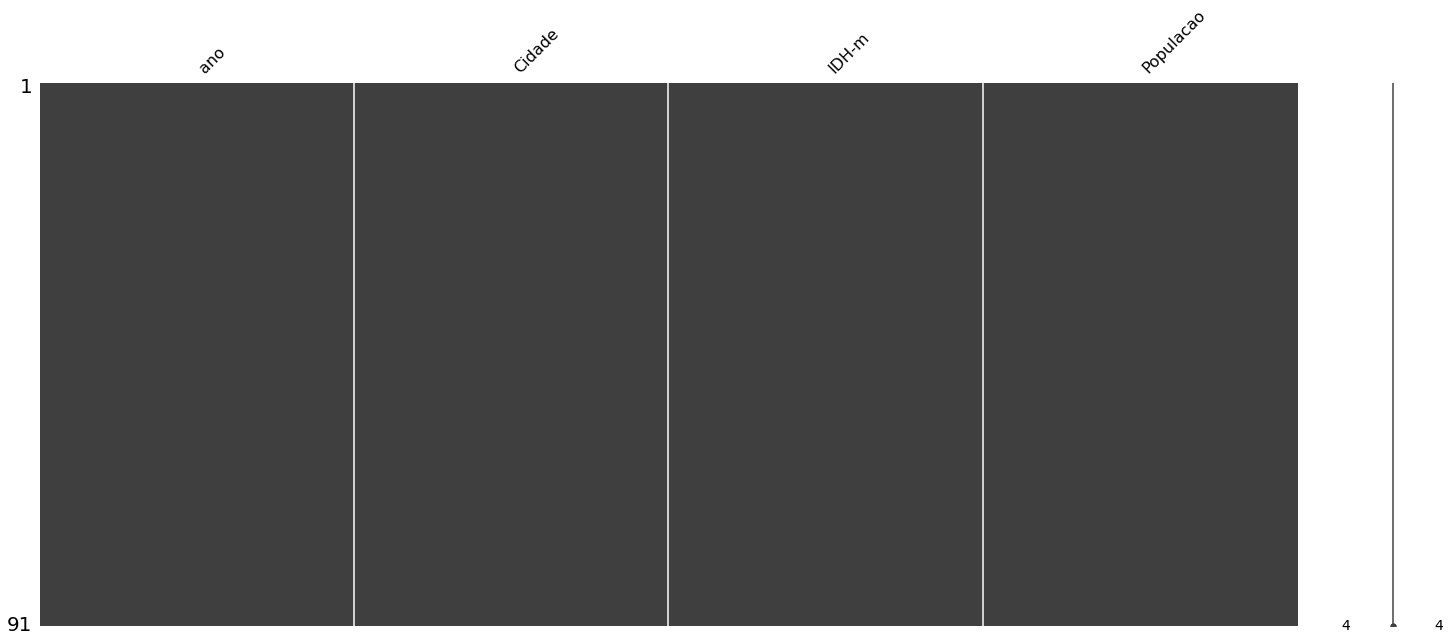

In [0]:
# VERIFICANDO TABELA 'LOCALIDADE'
col = list(dataset_tb_localidade.columns)
localidadeSemMissings = dataset_tb_localidade[col[:]]
localidadeSemMissings.replace(0, np.nan, inplace=True)
ms.matrix(localidadeSemMissings)

Out[10]: <AxesSubplot:>

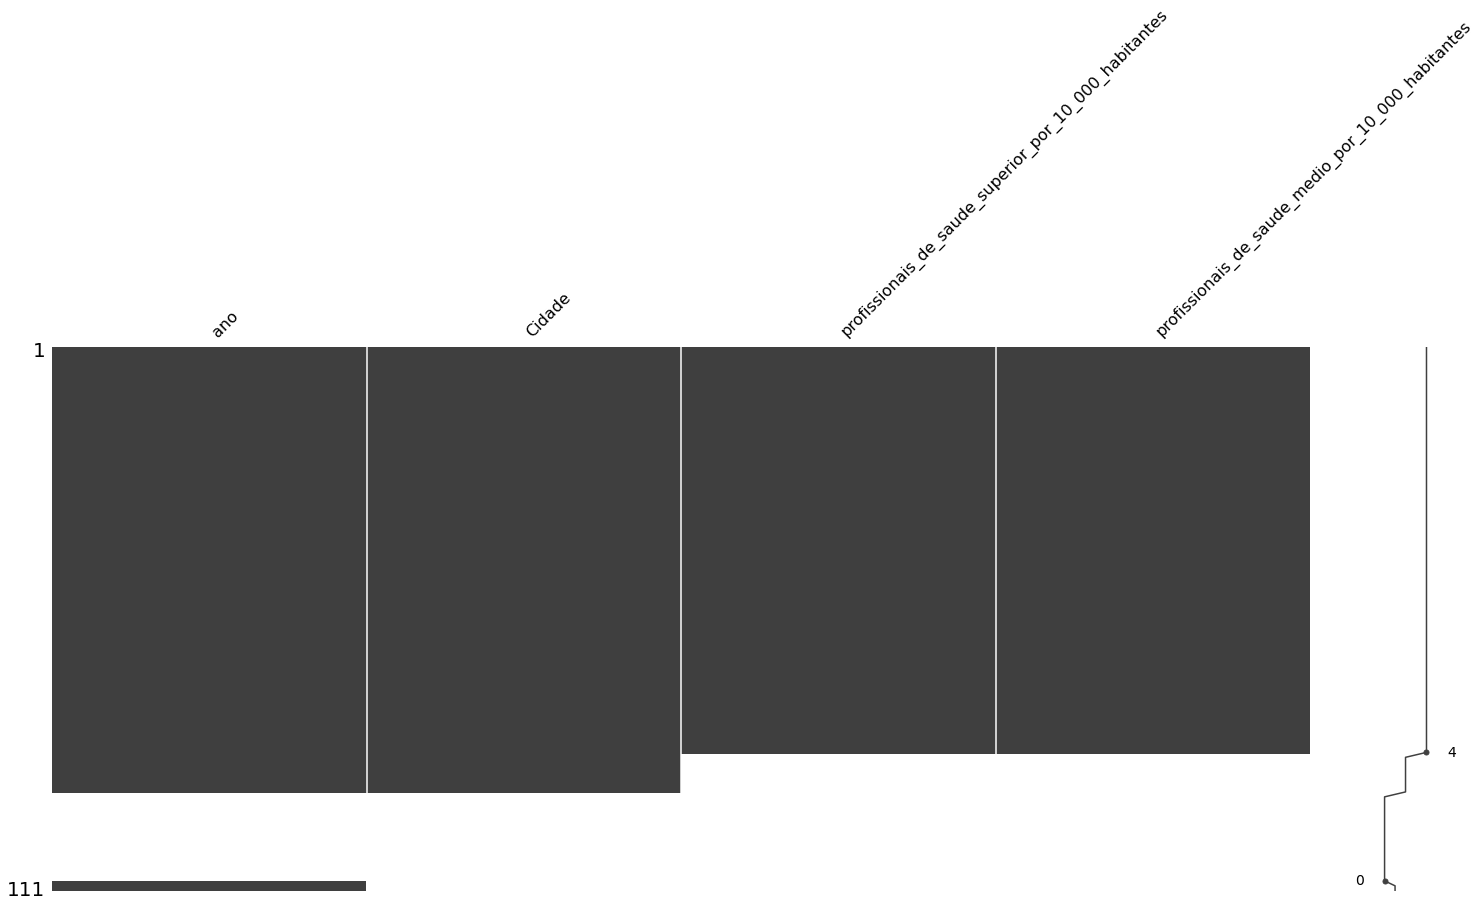

In [0]:
# VERIFICANDO TABELA 'FORÇA DE TRABALHO'
col = list(dataset_tb_forca_de_trabalho.columns)
forcaSemMissings = dataset_tb_forca_de_trabalho[col[:]]
forcaSemMissings.replace(0, np.nan, inplace=True)

ms.matrix(forcaSemMissings)

Out[11]: <AxesSubplot:>

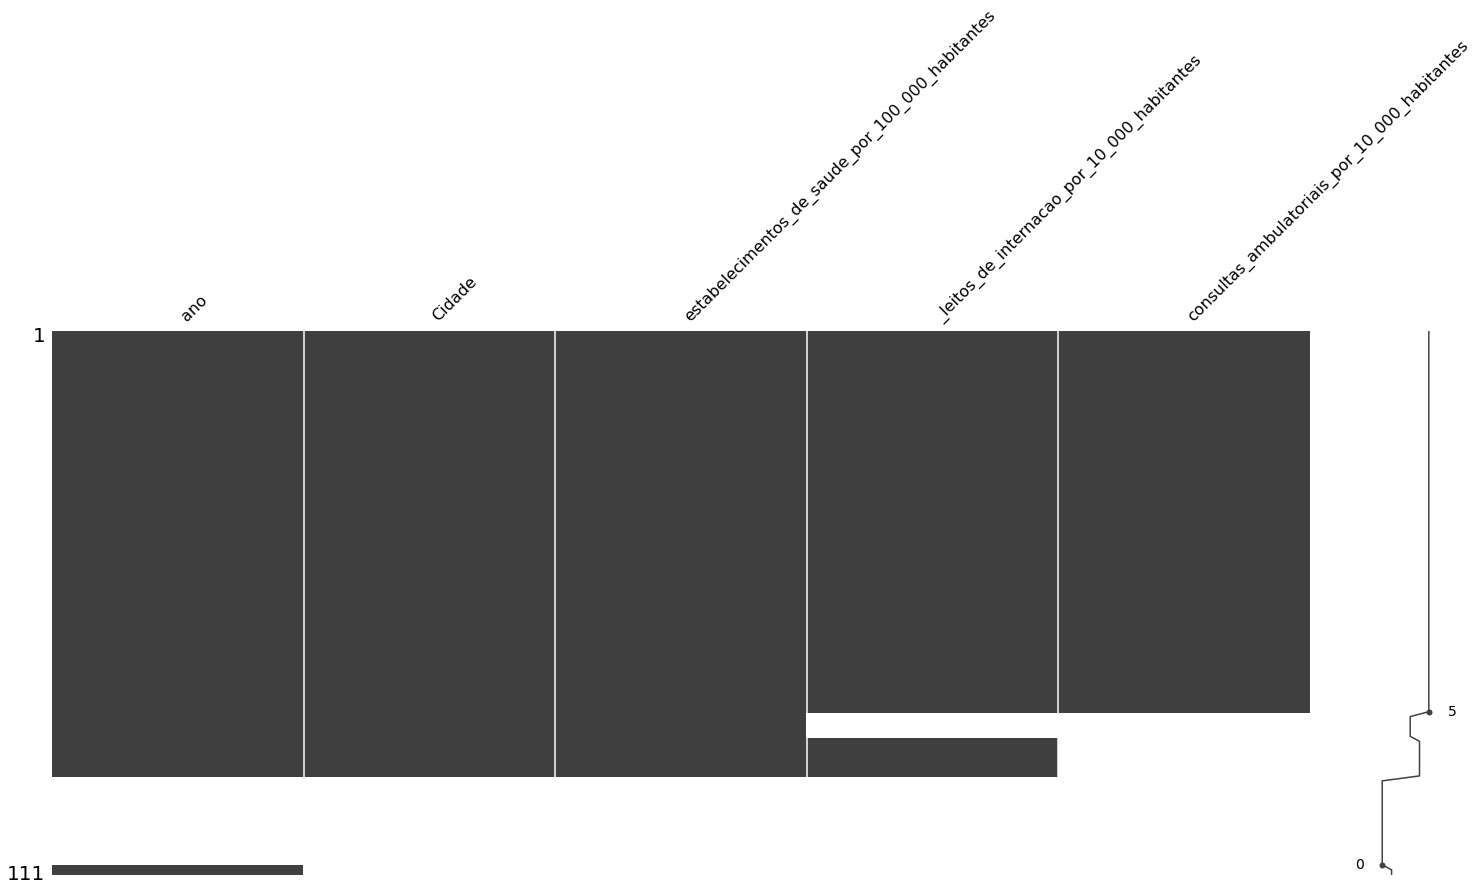

In [0]:
# VERIFICANDO TABELA 'PROVIMENTO'
col = list(dataset_tb_provimento.columns)
provimentoSemMissings = dataset_tb_provimento[col[:]]
provimentoSemMissings.replace(0, np.nan, inplace=True)
ms.matrix(provimentoSemMissings)

Out[12]: <AxesSubplot:>

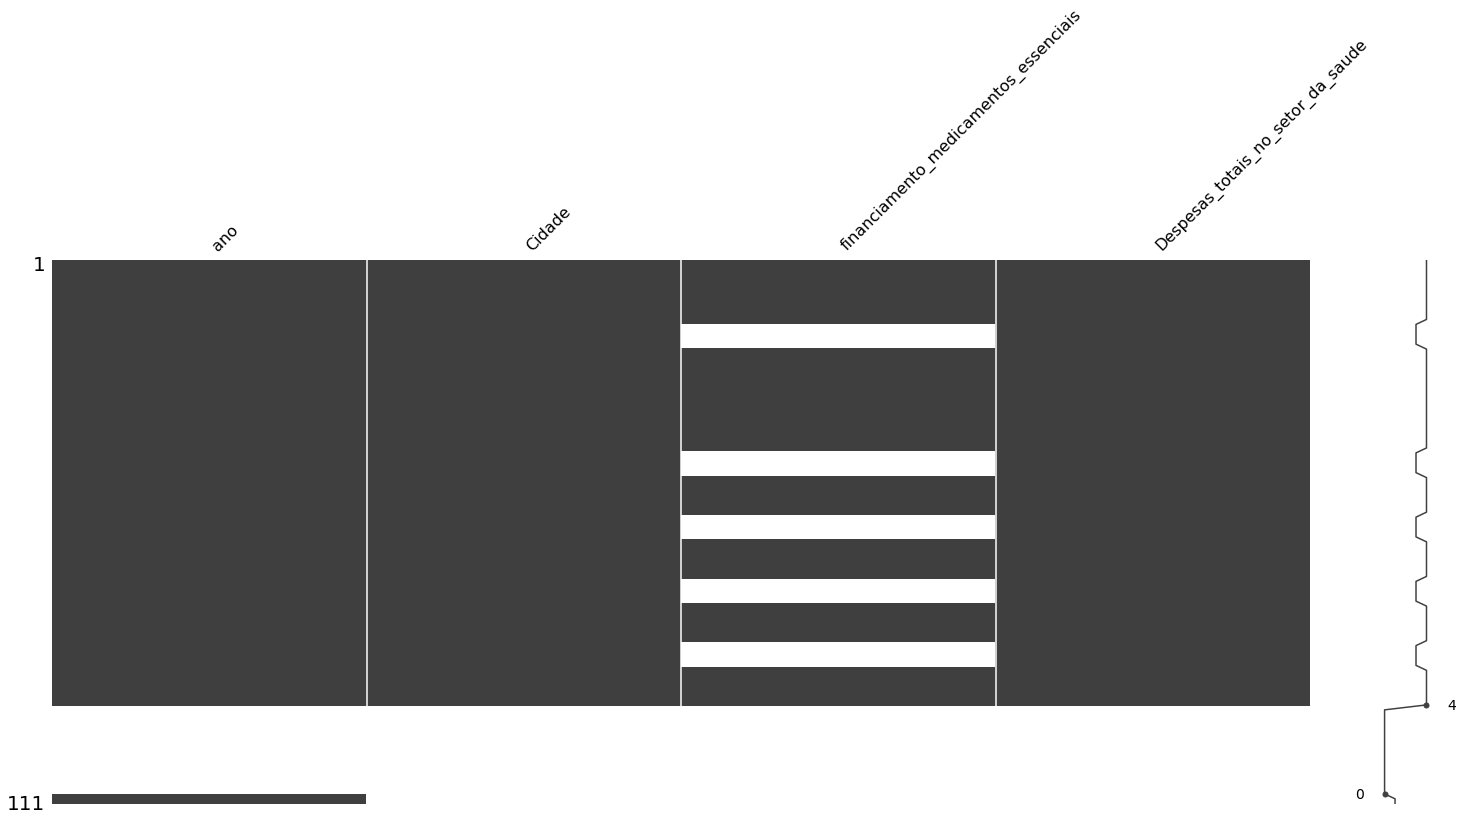

In [0]:
# VERIFICANDO TABELA 'FINANCIAMENTO'
col = list(dataset_tb_financiamento.columns)
financiamentoSemMissings = dataset_tb_financiamento[col[:]]
financiamentoSemMissings.replace(0, np.nan, inplace=True)
ms.matrix(financiamentoSemMissings)

Out[13]: <AxesSubplot:>

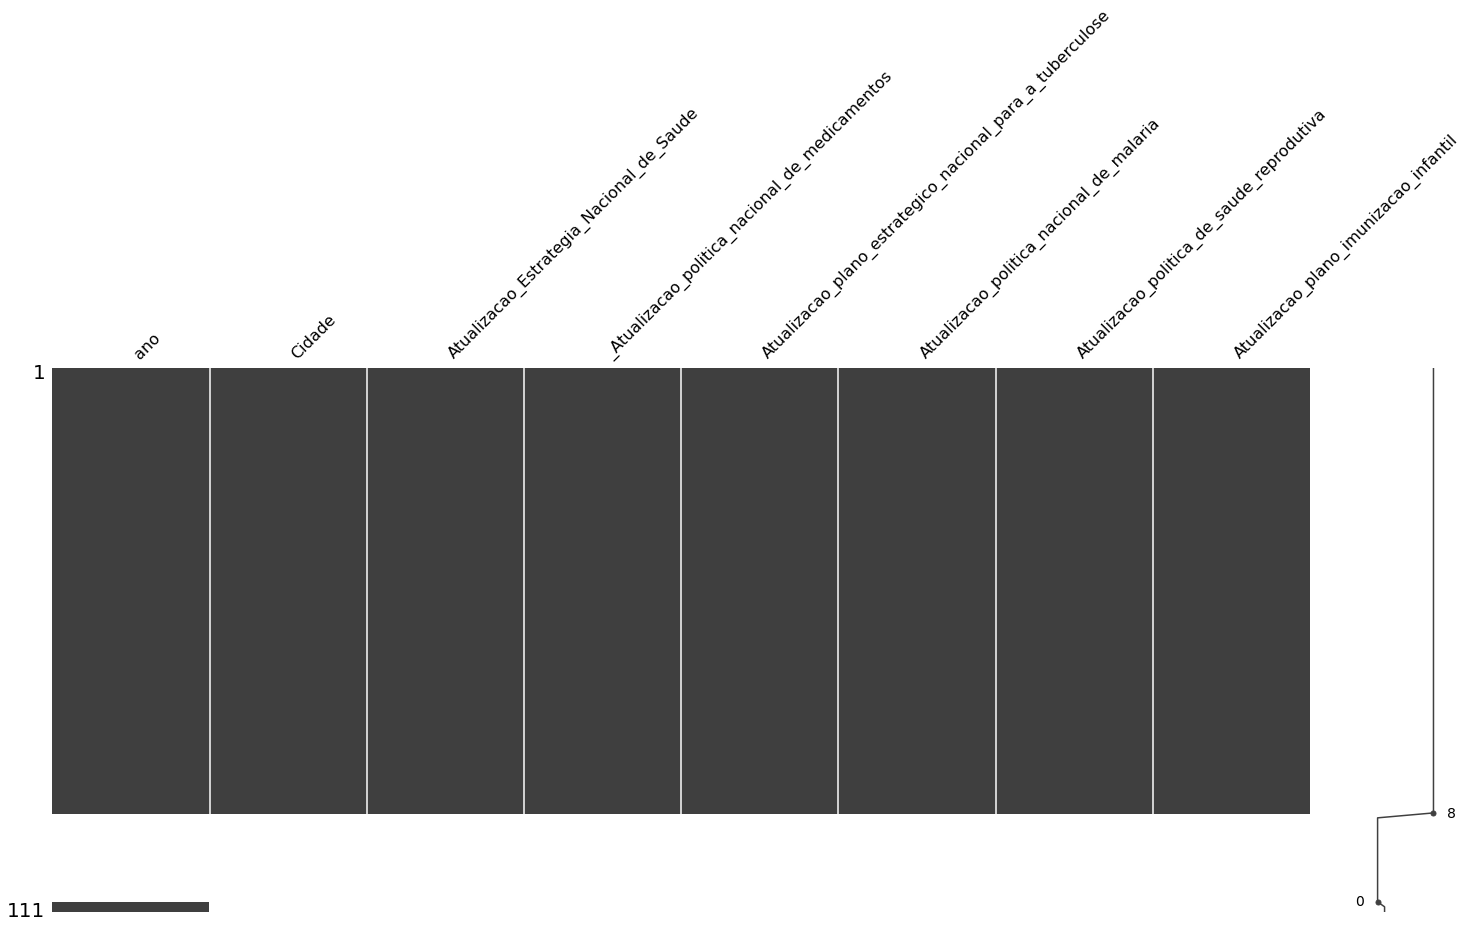

In [0]:
# VERIFICANDO TABELA 'GOVERNANÇA'
col = list(dataset_tb_governanca.columns)
governancaSemMissings = dataset_tb_governanca[col[:]]
governancaSemMissings.replace(0, np.nan, inplace=True)
ms.matrix(governancaSemMissings)

Out[14]: <AxesSubplot:>

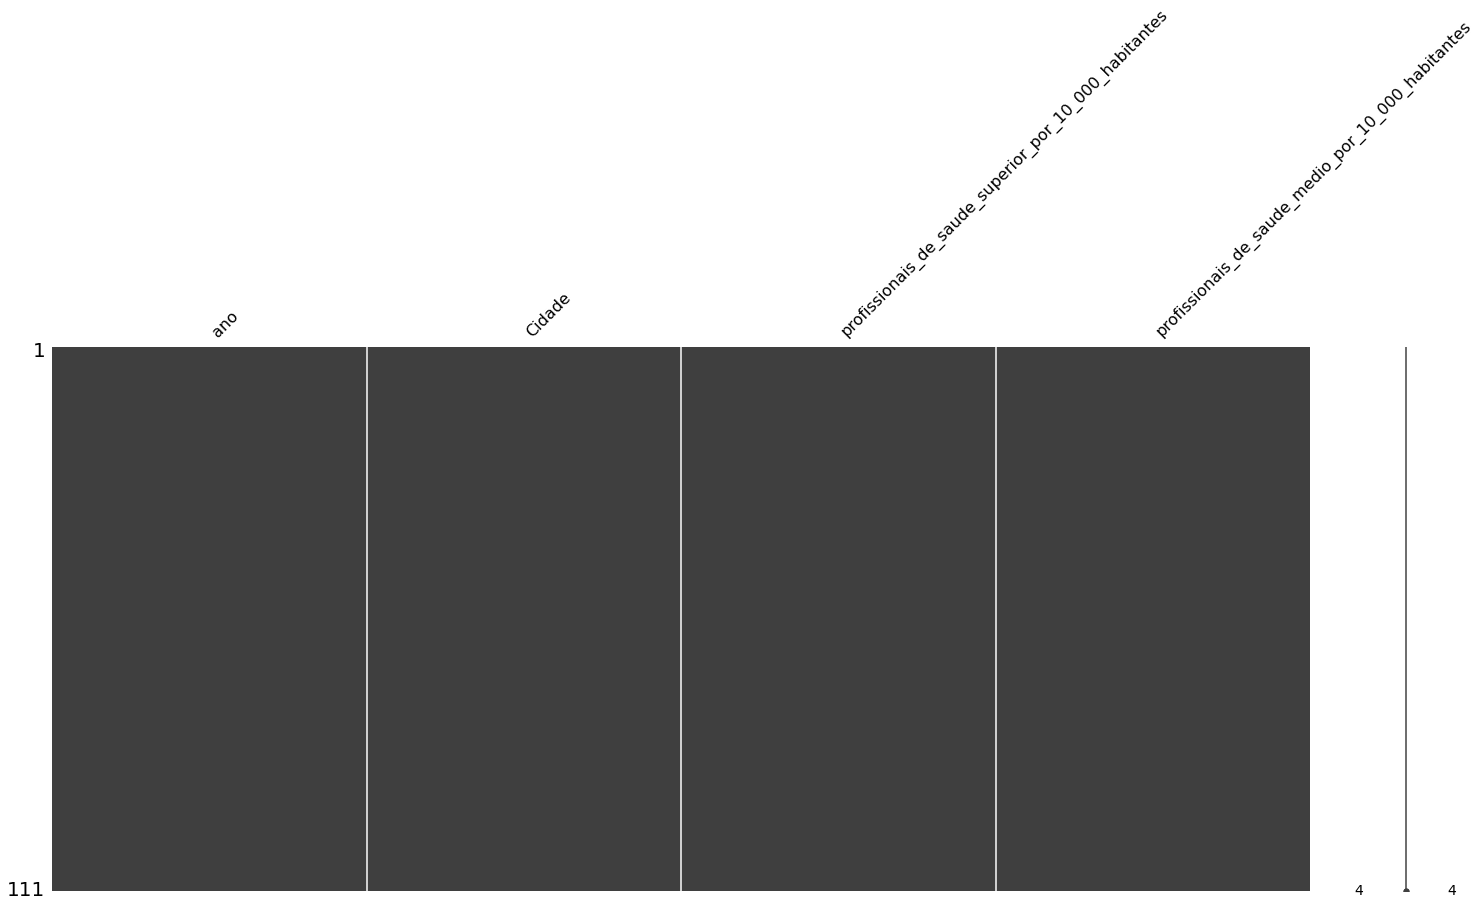

In [0]:
# TRANTANDO MISSINGS DA TABELA 'FORÇA DE TRABALHO'
forcaSemMissings['ano'].fillna(0, inplace=True)
forcaSemMissings['Cidade'].fillna(0, inplace=True)
forcaSemMissings['profissionais_de_saude_superior_por_10_000_habitantes'].fillna(0, inplace=True)
forcaSemMissings['profissionais_de_saude_medio_por_10_000_habitantes'].fillna(0, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(forcaSemMissings)

Out[15]: <AxesSubplot:>

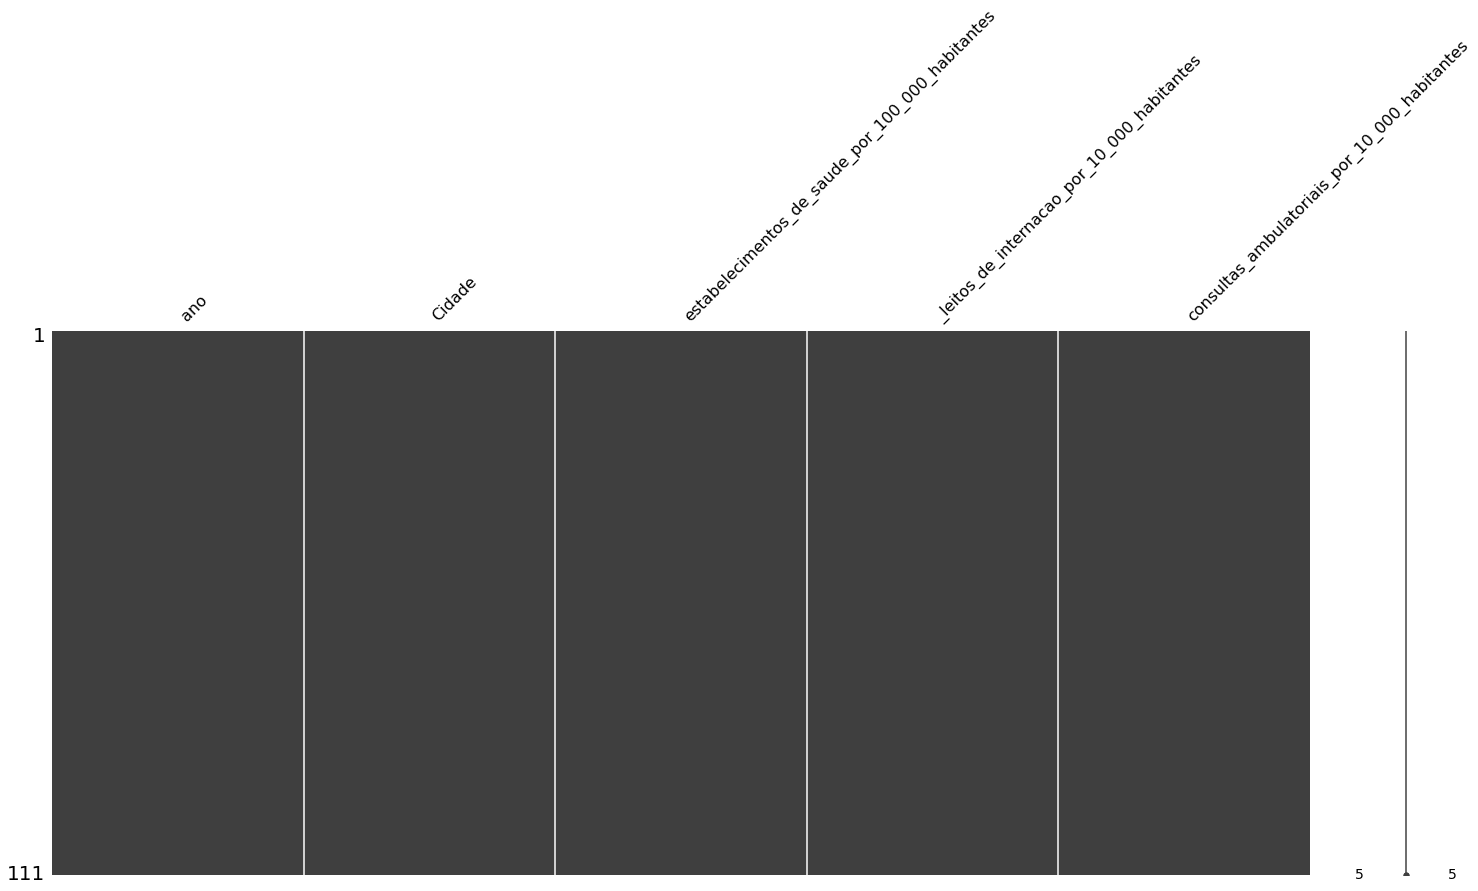

In [0]:
# TRANTANDO MISSINGS DA TABELA 'PROVIMENTO'
provimentoSemMissings['ano'].fillna(0, inplace=True)
provimentoSemMissings['Cidade'].fillna(0, inplace=True)
provimentoSemMissings['estabelecimentos_de_saude_por_100_000_habitantes'].fillna(0, inplace=True)
provimentoSemMissings['_leitos_de_internacao_por_10_000_habitantes'].fillna(0, inplace=True)
provimentoSemMissings['consultas_ambulatoriais_por_10_000_habitantes'].fillna(0, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(provimentoSemMissings)

Out[16]: <AxesSubplot:>

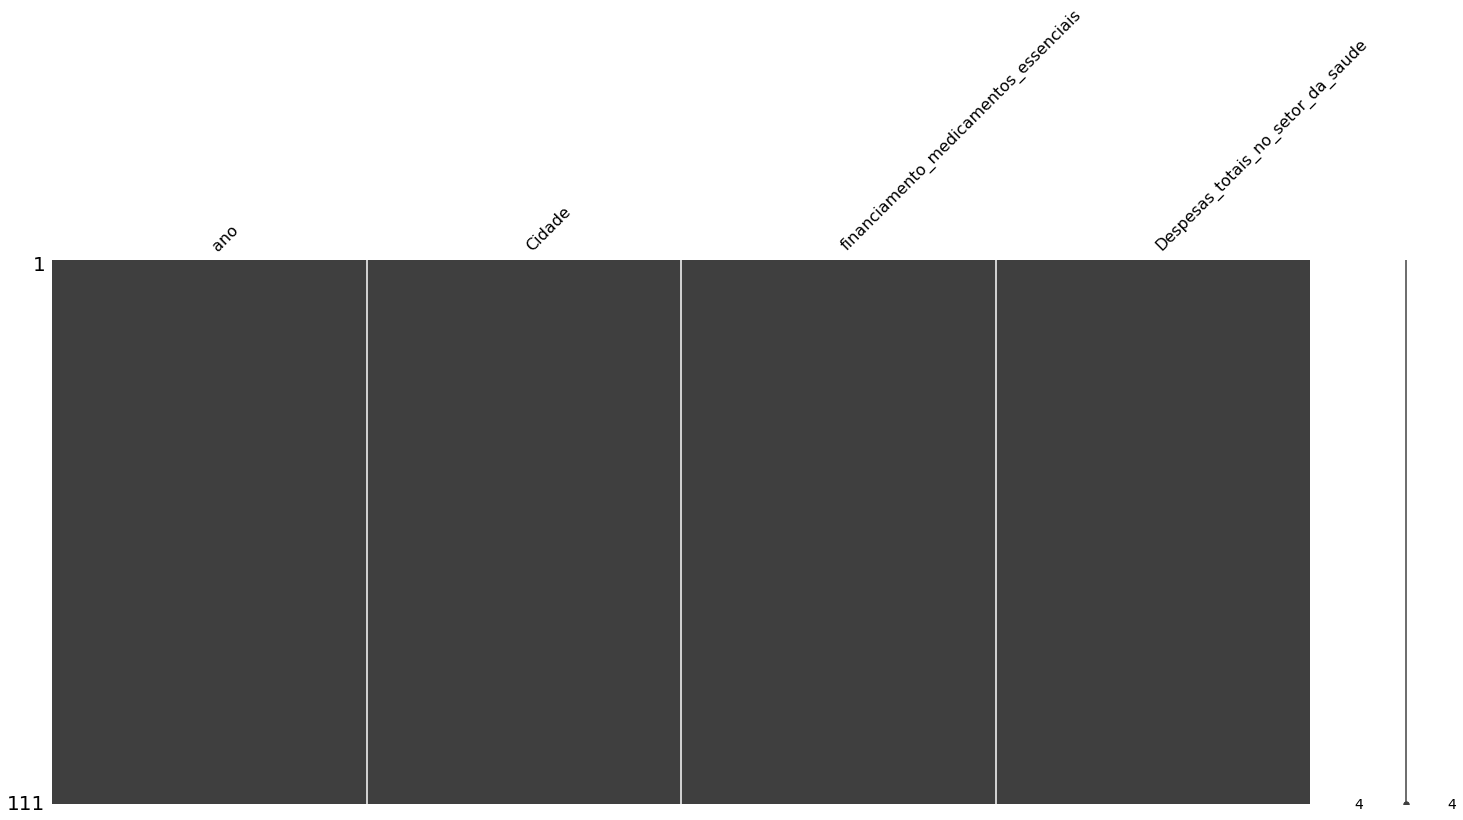

In [0]:
# TRANTANDO MISSINGS DA TABELA 'FINANCIAMENTO'
financiamentoSemMissings['ano'].fillna(0, inplace=True)
financiamentoSemMissings['Cidade'].fillna(0, inplace=True)
financiamentoSemMissings['financiamento_medicamentos_essenciais'].fillna(0, inplace=True)
financiamentoSemMissings['Despesas_totais_no_setor_da_saude'].fillna(0, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(financiamentoSemMissings)

Out[17]: <AxesSubplot:>

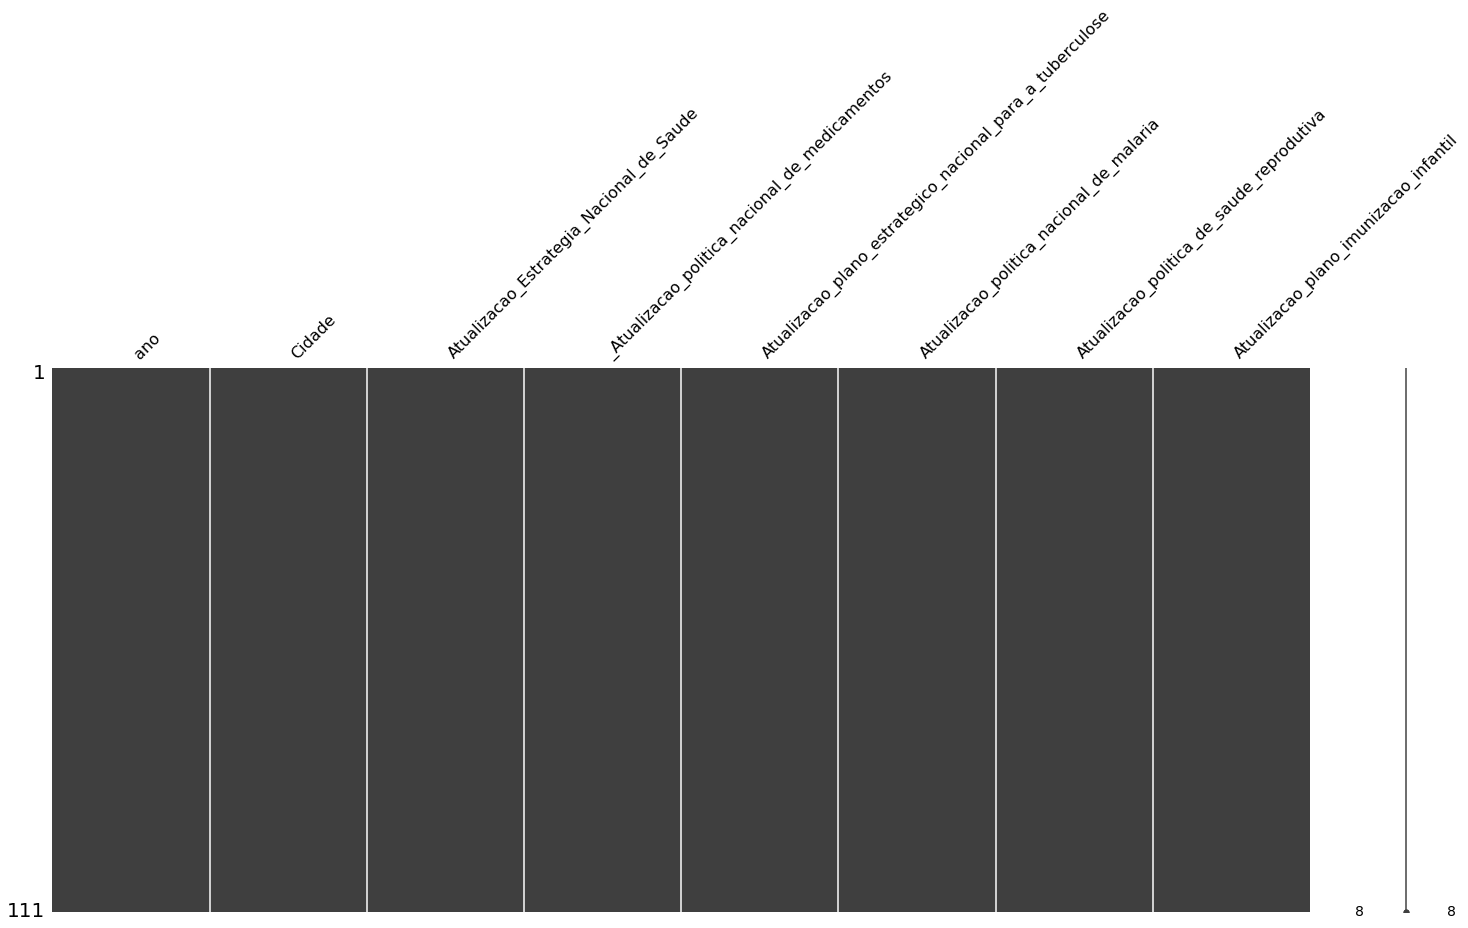

In [0]:
# TRANTANDO MISSINGS DA TABELA 'GOVERNANÇA'
governancaSemMissings.dropna()

governancaSemMissings['ano'].fillna(0, inplace=True)
governancaSemMissings['Cidade'].fillna(0, inplace=True)
governancaSemMissings['Atualizacao_Estrategia_Nacional_de_Saude'].fillna(0, inplace=True)
governancaSemMissings['_Atualizacao_politica_nacional_de_medicamentos'].fillna(0, inplace=True)
governancaSemMissings['Atualizacao_plano_estrategico_nacional_para_a_tuberculose'].fillna(0, inplace=True)
governancaSemMissings['Atualizacao_politica_nacional_de_malaria'].fillna(0, inplace=True)
governancaSemMissings['Atualizacao_politica_de_saude_reprodutiva'].fillna(0, inplace=True)
governancaSemMissings['Atualizacao_plano_imunizacao_infantil'].fillna(0, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(governancaSemMissings)

Transformação de dados

In [0]:
# NORMALIZANDO A TABELA 'FORÇA DE TRABALHO'
forcaSemMissings[['profissionais_de_saude_superior_por_10_000_habitantes','profissionais_de_saude_medio_por_10_000_habitantes']] = MinMaxScaler().fit_transform(forcaSemMissings[['profissionais_de_saude_superior_por_10_000_habitantes','profissionais_de_saude_medio_por_10_000_habitantes']])

# PADRONIZANDO A TABELA 'FORÇA DE TRABALHO'
forcaSemMissings[['profissionais_de_saude_superior_por_10_000_habitantes','profissionais_de_saude_medio_por_10_000_habitantes']] = StandardScaler().fit_transform(forcaSemMissings[['profissionais_de_saude_superior_por_10_000_habitantes','profissionais_de_saude_medio_por_10_000_habitantes']])

forcaSemMissings.head()

,ano,Cidade,profissionais_de_saude_superior_por_10_000_habitantes,profissionais_de_saude_medio_por_10_000_habitantes
0,2010,Curitiba,-0.326681,-0.326684
1,2011,Curitiba,-0.312784,-0.312786
2,2012,Curitiba,-0.260655,-0.260652
3,2013,Curitiba,-0.254763,-0.254767
4,2014,Curitiba,-0.247136,-0.247138


In [0]:
# NORMALIZANDO A TABELA 'PROVIMENTO'
provimentoSemMissings[['estabelecimentos_de_saude_por_100_000_habitantes','_leitos_de_internacao_por_10_000_habitantes','consultas_ambulatoriais_por_10_000_habitantes']] = MinMaxScaler().fit_transform(provimentoSemMissings[['estabelecimentos_de_saude_por_100_000_habitantes','_leitos_de_internacao_por_10_000_habitantes','consultas_ambulatoriais_por_10_000_habitantes']])

# PADRONIZANDO A TABELA 'PROVIMENTO'
provimentoSemMissings[['estabelecimentos_de_saude_por_100_000_habitantes','_leitos_de_internacao_por_10_000_habitantes','consultas_ambulatoriais_por_10_000_habitantes']] = StandardScaler().fit_transform(provimentoSemMissings[['estabelecimentos_de_saude_por_100_000_habitantes','_leitos_de_internacao_por_10_000_habitantes','consultas_ambulatoriais_por_10_000_habitantes']])

provimentoSemMissings.head()

,ano,Cidade,estabelecimentos_de_saude_por_100_000_habitantes,_leitos_de_internacao_por_10_000_habitantes,consultas_ambulatoriais_por_10_000_habitantes
0,2010,Curitiba,-0.362021,-0.584941,-0.076619
1,2011,Curitiba,-0.354523,-0.580196,-0.083771
2,2012,Curitiba,-0.282045,-0.574728,-0.327125
3,2013,Curitiba,-0.263161,-0.568277,-0.196551
4,2014,Curitiba,-0.245389,-0.568693,-0.111042


In [0]:
# NORMALIZANDO A TABELA 'FINANCIAMENTO'
financiamentoSemMissings[['financiamento_medicamentos_essenciais','Despesas_totais_no_setor_da_saude']] = MinMaxScaler().fit_transform(financiamentoSemMissings[['financiamento_medicamentos_essenciais','Despesas_totais_no_setor_da_saude']])

# PADRONIZANDO A TABELA 'FINANCIAMENTO'
financiamentoSemMissings[['financiamento_medicamentos_essenciais','Despesas_totais_no_setor_da_saude']] = StandardScaler().fit_transform(financiamentoSemMissings[['financiamento_medicamentos_essenciais','Despesas_totais_no_setor_da_saude']])

financiamentoSemMissings.head()

,ano,Cidade,financiamento_medicamentos_essenciais,Despesas_totais_no_setor_da_saude
0,2010,Curitiba,-0.243427,-0.147855
1,2011,Curitiba,-0.166607,-0.112321
2,2012,Curitiba,-0.201219,-0.012917
3,2013,Curitiba,-0.201219,-0.033547
4,2014,Curitiba,-0.201219,0.053193


In [0]:
# A tabela 'Governanca' tem somente variáveis ordinais. Foi necessário tratá-la
governancaSemMissings['Atualizacao_Estrategia_Nacional_de_Saude'] = governancaSemMissings['Atualizacao_Estrategia_Nacional_de_Saude'].astype(str)
governancaSemMissings['_Atualizacao_politica_nacional_de_medicamentos'] = governancaSemMissings['_Atualizacao_politica_nacional_de_medicamentos'].astype(str)
governancaSemMissings['Atualizacao_plano_estrategico_nacional_para_a_tuberculose'] = governancaSemMissings['Atualizacao_plano_estrategico_nacional_para_a_tuberculose'].astype(str)
governancaSemMissings['Atualizacao_politica_nacional_de_malaria'] = governancaSemMissings['Atualizacao_politica_nacional_de_malaria'].astype(str)
governancaSemMissings['Atualizacao_politica_de_saude_reprodutiva'] = governancaSemMissings['Atualizacao_politica_de_saude_reprodutiva'].astype(str)
governancaSemMissings['Atualizacao_plano_imunizacao_infantil'] = governancaSemMissings['Atualizacao_plano_imunizacao_infantil'].astype(str)

governancaSemMissings[['Atualizacao_Estrategia_Nacional_de_Saude','_Atualizacao_politica_nacional_de_medicamentos','Atualizacao_plano_estrategico_nacional_para_a_tuberculose','Atualizacao_politica_nacional_de_malaria','Atualizacao_politica_de_saude_reprodutiva','Atualizacao_plano_imunizacao_infantil']] = OrdinalEncoder().fit_transform(governancaSemMissings[['Atualizacao_Estrategia_Nacional_de_Saude','_Atualizacao_politica_nacional_de_medicamentos','Atualizacao_plano_estrategico_nacional_para_a_tuberculose','Atualizacao_politica_nacional_de_malaria','Atualizacao_politica_de_saude_reprodutiva','Atualizacao_plano_imunizacao_infantil']])

governancaSemMissings.info()
governancaSemMissings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 8 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   ano                                                        111 non-null    object 
 1   Cidade                                                     111 non-null    object 
 2   Atualizacao_Estrategia_Nacional_de_Saude                   111 non-null    float64
 3   _Atualizacao_politica_nacional_de_medicamentos             111 non-null    float64
 4   Atualizacao_plano_estrategico_nacional_para_a_tuberculose  111 non-null    float64
 5   Atualizacao_politica_nacional_de_malaria                   111 non-null    float64
 6   Atualizacao_politica_de_saude_reprodutiva                  111 non-null    float64
 7   Atualizacao_plano_imunizacao_infantil                      111 non-null    float64
dtypes: float64(

,ano,Cidade,Atualizacao_Estrategia_Nacional_de_Saude,_Atualizacao_politica_nacional_de_medicamentos,Atualizacao_plano_estrategico_nacional_para_a_tuberculose,Atualizacao_politica_nacional_de_malaria,Atualizacao_politica_de_saude_reprodutiva,Atualizacao_plano_imunizacao_infantil
0,2010,Curitiba,2.0,2.0,2.0,2.0,2.0,2.0
1,2011,Curitiba,2.0,2.0,2.0,1.0,2.0,2.0
2,2012,Curitiba,2.0,2.0,2.0,2.0,2.0,2.0
3,2013,Curitiba,2.0,2.0,2.0,2.0,2.0,2.0
4,2014,Curitiba,1.0,2.0,2.0,1.0,1.0,2.0


Consultas

In [0]:
# SEÇÃO E CONTEXTO SPARK
spark = SparkSession.builder.master("local[*]").getOrCreate()
conf = SparkConf().set('spark.ui.port','4050').setAppName("sistema_de_saude").setMaster("local[*]")
sc = SparkContext.getOrCreate(conf=conf)

In [0]:
# INSERINDO OS DADOS TRANSFORMADOS NAS TABELAS

# LOCALIDADE
df_localidade = spark.createDataFrame(localidadeSemMissings)
df_localidade.write.saveAsTable("tb_localidade", mode="overwrite")

# FORÇA DE TRABALHO
df_forca_de_trabalho = spark.createDataFrame(forcaSemMissings)
df_forca_de_trabalho.write.saveAsTable("tb_forca_de_trabalho", mode="overwrite")

# PROVIMENTO
df_provimento = spark.createDataFrame(provimentoSemMissings)
df_provimento.write.saveAsTable("tb_provimento", mode="overwrite")

# FINANCIAMENTO
df_financiamento = spark.createDataFrame(financiamentoSemMissings)
df_financiamento.write.saveAsTable("tb_financiamento", mode="overwrite")

# GOVERNANÇA
df_governanca = spark.createDataFrame(governancaSemMissings)
df_governanca.write.saveAsTable("tb_governanca", mode="overwrite")

In [0]:
# QUERIES
# OBS: A TABELA GOVERNANÇA POSSUI VALORES CATEGÓRICOS QUE NÃO CONTRIBUEM PARA AS RESPOSTAS ÀS QUESTÕES.

#QUESTÃO 1: Média de cada dimensão nos últimos 10 anos
sql_q1 = "SELECT l.Cidade, AVG((ft.profissionais_de_saude_superior_por_10_000_habitantes + ft.profissionais_de_saude_medio_por_10_000_habitantes)/2) as media_forca, AVG((p.estabelecimentos_de_saude_por_100_000_habitantes + p._leitos_de_internacao_por_10_000_habitantes + p.consultas_ambulatoriais_por_10_000_habitantes)/3) as media_provimento, AVG((f.financiamento_medicamentos_essenciais + f.Despesas_totais_no_setor_da_saude) /2) as media_financiamento FROM tb_localidade l, tb_forca_de_trabalho ft, tb_provimento p, tb_financiamento f WHERE ft.Cidade = l.Cidade AND P.Cidade = l.Cidade AND f.Cidade = l.Cidade GROUP BY l.Cidade ORDER BY l.Cidade"

q1 = spark.sql(sql_q1)
q1.show()

+------------+--------------------+--------------------+--------------------+
|      Cidade|         media_forca|    media_provimento| media_financiamento|
+------------+--------------------+--------------------+--------------------+
|    Curitiba| -0.2321519915060174| -0.3527175281890027|0.003211348198179381|
|   Fortaleza|-0.18570741774292152| -0.0695341674665655| -0.1624415585975683|
|      Manaus| -0.3495497820968127|-0.17994322237821803| -0.4109038513609975|
|Porto Alegre| 0.03869943297290212|-0.14237431039514387|-0.13065227205250954|
+------------+--------------------+--------------------+--------------------+



In [0]:
#QUESTÃO 2: Maior valor médio (da soma dos atributos) em cada ano
sql_q2 = "SELECT l.ano, MAX((ft.profissionais_de_saude_superior_por_10_000_habitantes + ft.profissionais_de_saude_medio_por_10_000_habitantes)/2) as max_forca, MAX((p.estabelecimentos_de_saude_por_100_000_habitantes + p._leitos_de_internacao_por_10_000_habitantes + p.consultas_ambulatoriais_por_10_000_habitantes)/3) as max_provimento, MAX((f.financiamento_medicamentos_essenciais + f.Despesas_totais_no_setor_da_saude) /2) as max_financiamento FROM tb_localidade l, tb_forca_de_trabalho ft, tb_provimento p, tb_financiamento f, tb_governanca g WHERE ft.Cidade = l.Cidade AND P.Cidade = l.Cidade AND f.Cidade = l.Cidade AND g.Cidade = l.Cidade AND ft.ano = l.ano AND P.ano = l.ano AND f.ano = l.ano AND g.ano = l.ano GROUP BY l.ano ORDER BY l.ano"

q2 = spark.sql(sql_q2)
q2.show()

+----+--------------------+--------------------+--------------------+
| ano|           max_forca|      max_provimento|   max_financiamento|
+----+--------------------+--------------------+--------------------+
|2010|-0.25516125860881805|  -0.327559002689268|-0.19564077109354533|
|2011|-0.26480302208131845| -0.3354851315099678| -0.1394641223017814|
|2012| -0.2599661498841384|-0.28784758456760434| -0.1070679758768157|
|2013|-0.24016995906559233| -0.2635562524202307|-0.11738327613929775|
|2014|-0.24665045683852865|-0.25419969468408327|-0.07401308770015058|
|2015|-0.23756884406349044|   -0.25017463433006|-0.03834658500101053|
|2016|  0.2176330652071335| 0.09989609583281474|-0.03680243187673201|
|2017| 0.26626538750786277| 0.13810424548167974|-0.00781868873089002|
|2018| 0.30765548461749387| 0.15485411163916132| 0.08331502567744349|
|2019| 0.34982281504734414| 0.15992305741354337| 0.07803596768078949|
|2020|  0.4178811247648251| 0.16173833619134506|  0.2488918142243614|
|2021|  0.5374161206

In [0]:
#QUESTÃO 3: Desempenho das médias das dimensões PROVIMENTO, FORÇA DE TRABALHO E GOVERNANCA no ano de menor FINANCIAMENTO 
sql_q3 = "SELECT l.Cidade, AVG((ft.profissionais_de_saude_superior_por_10_000_habitantes + ft.profissionais_de_saude_medio_por_10_000_habitantes)/2) as media_forca, AVG((p.estabelecimentos_de_saude_por_100_000_habitantes + p._leitos_de_internacao_por_10_000_habitantes + p.consultas_ambulatoriais_por_10_000_habitantes)/3) as media_provimento FROM tb_localidade l, tb_forca_de_trabalho ft, tb_provimento p, tb_governanca g WHERE l.ano IN (SELECT temp.ano FROM (SELECT f.ano, MIN(f.Despesas_totais_no_setor_da_saude) FROM tb_financiamento f GROUP BY f.ano) temp) AND ft.Cidade = l.Cidade AND P.Cidade = l.Cidade AND g.Cidade = l.Cidade GROUP BY l.Cidade ORDER BY l.cidade"

q3 = spark.sql(sql_q3)
q3.show()

+------------+--------------------+--------------------+
|      Cidade|         media_forca|    media_provimento|
+------------+--------------------+--------------------+
|    Curitiba|-0.23215199150604462| -0.3527175281889597|
|   Fortaleza|-0.18570741774291236|-0.06953416746656739|
|      Manaus|-0.34954978209676635| -0.1799432223782264|
|Porto Alegre| 0.03869943297287168|-0.14237431039516538|
+------------+--------------------+--------------------+



FASE OURO

Visualização de dados

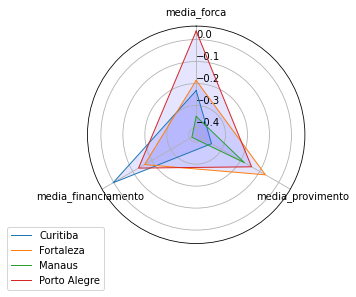

In [0]:
# GRÁFICO DE RADAR DA QUESTÃO 1

df = q1.toPandas()
categories=list(df)[1:]
N = len(categories)
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
ax = plt.subplot(111, polar=True)
 
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
plt.xticks(angles[:-1], categories)
 
ax.set_rlabel_position(0)
 
for row in range(0, len(df.index)):
    values=df.loc[row].drop('Cidade').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=df['Cidade'][row])
    ax.fill(angles, values, 'b', alpha=0.1)
 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

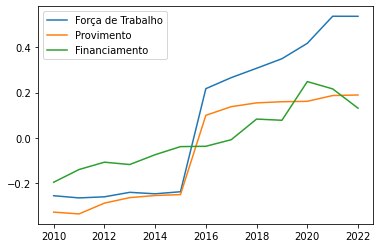

In [0]:
# GRÁFICO DE LINHAS DA QUESTÃO 2

ano = np.array(q2.select("ano").rdd.flatMap(lambda x: x).collect())
media_forca = np.array(q2.select("max_forca").rdd.flatMap(lambda x: x).collect())
media_provimento = np.array(q2.select("max_provimento").rdd.flatMap(lambda x: x).collect())
media_financiamento = np.array(q2.select("max_financiamento").rdd.flatMap(lambda x: x).collect())

plt.plot(ano, media_forca, label='Força de Trabalho')
plt.plot(ano, media_provimento, label='Provimento')
plt.plot(ano, media_financiamento, label='Financiamento')

plt.legend()
plt.show()

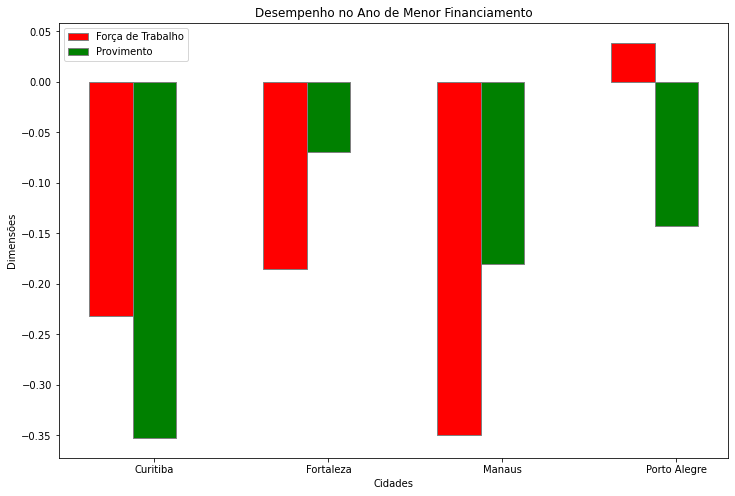

In [0]:
# GRÁFICO DE BARRAS DA QUESTÃO 3

cidade = np.array(q3.select("Cidade").rdd.flatMap(lambda x: x).collect())
media_forca = np.array(q3.select("media_forca").rdd.flatMap(lambda x: x).collect())
media_provimento = np.array(q3.select("media_provimento").rdd.flatMap(lambda x: x).collect())

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

br1 = np.arange(len(cidade)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

plt.bar(br1, media_forca, color ='r', width = barWidth, edgecolor ='grey', label ='Força de Trabalho') 
plt.bar(br2, media_provimento, color ='g', width = barWidth, edgecolor ='grey', label ='Provimento') 

plt.xlabel("Cidades")
plt.ylabel("Dimensões")
plt.title("Desempenho no Ano de Menor Financiamento")
plt.xticks([r + barWidth for r in range(len(cidade))], cidade)

plt.legend()
plt.show()